In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

In [2]:
match_data= pd.read_csv(r'C:\Users\yadav\OneDrive\Desktop\DA\Datasets\IPL Matches 2008-2020.csv')
delivery_data= pd.read_csv(r'C:\Users\yadav\OneDrive\Desktop\DA\Datasets\IPL Ball-by-Ball 2008-2020.csv')

In [3]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
delivery_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
match_data.shape

(816, 17)

In [6]:
match_data.shape[0]

816

In [7]:
match_data['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

Batsman Performance analysis

In [8]:
delivery_data['batsman'].unique()

array(['RT Ponting', 'BB McCullum', 'DJ Hussey', 'Mohammad Hafeez',
       'SC Ganguly', 'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke',
       'P Kumar', 'Z Khan', 'SB Joshi', 'W Jaffer', 'JH Kallis',
       'R Dravid', 'V Kohli', 'K Goel', 'MEK Hussey', 'JR Hopes',
       'SK Raina', 'JDP Oram', 'S Badrinath', 'PA Patel', 'ML Hayden',
       'MS Dhoni', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'S Dhawan', 'G Gambhir',
       'SK Warne', 'D Salunkhe', 'SK Trivedi', 'V Sehwag', 'SR Watson',
       'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'WP Saha', 'AS Yadav', 'A Symonds', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'AC Gilchrist', 'Y Venugopal Rao',
       'VVS Laxman', 'RG Sharma', 'SB Styris', 'LR Shukla', 'PP Chawla',
       'Kamran Akmal', 'DPMD Jayawardene'

In [9]:
filter_1 = delivery_data['batsman'] == 'V Kohli'

In [10]:
df_kholi = delivery_data[filter_1]

In [11]:
df_kholi.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [12]:
df_kholi['dismissal_kind'].value_counts()

dismissal_kind
caught               105
bowled                30
run out               15
lbw                    7
stumped                3
caught and bowled      3
Name: count, dtype: int64

In [13]:
df_kholi['batsman_runs'].unique()

array([0, 1, 4, 6, 2, 3])

In [14]:
len(df_kholi[df_kholi['batsman_runs'] == 1])

1919

In [15]:
len(df_kholi[df_kholi['batsman_runs'] == 4])*4

2016

In [16]:
len(df_kholi[df_kholi['batsman_runs'] == 6])*6

1212

In [17]:
len(df_kholi[df_kholi['batsman_runs'] == 3])*3

39

In [18]:
len(df_kholi[df_kholi['batsman_runs'] == 2])*2

692

In [19]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot

In [20]:
values = [1919, 692, 39, 2016, 1212]
labels = [1,2,3,4,6]

trace = go.Pie(labels=labels, values=values, hole = 0.3, textinfo='label+percent',)

In [21]:
data = [trace]

In [22]:
fig = go.Figure(data = data)

In [23]:
fig.show()

Analyzing the toss decision across seasons of IPL

In [24]:
match_data['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [25]:
match_data['date'][0]

'2008-04-18'

In [26]:
'2008-04-18'.split('-')[0]

'2008'

In [27]:
def get_year(x):
    return x.split('-')[0]

In [28]:
Seasons= match_data['date'].apply(get_year)

In [29]:
match_data['Season'] = Seasons

In [30]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [33]:
match_data['toss_decision']

0      field
1        bat
2        bat
3        bat
4        bat
       ...  
811    field
812    field
813    field
814      bat
815      bat
Name: toss_decision, Length: 816, dtype: object

In [37]:
type(match_data.groupby(['Season', 'toss_decision']).size())

pandas.core.series.Series

In [40]:
season_toss_count_df = match_data.groupby(['Season', 'toss_decision']).size().reset_index(name='count')

<Axes: xlabel='Season', ylabel='count'>

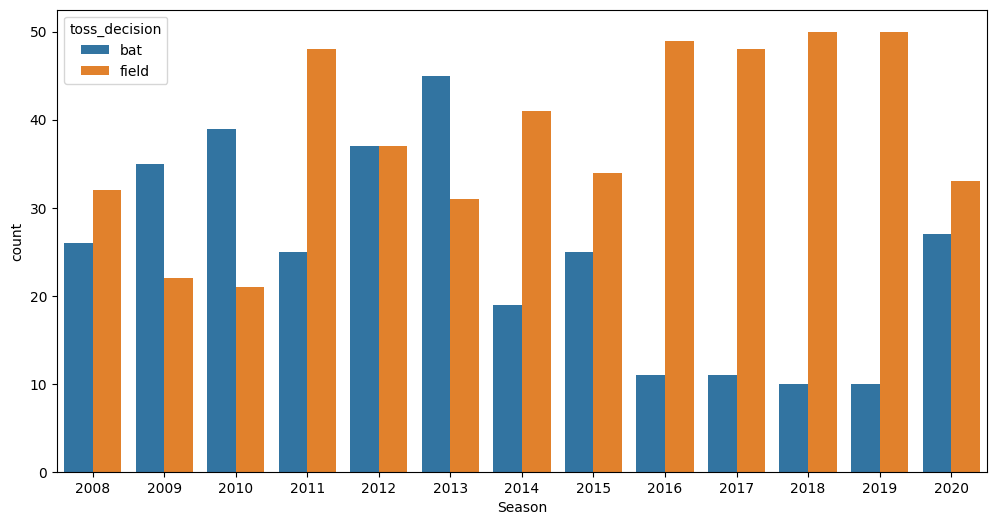

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='count', hue='toss_decision', data=season_toss_count_df)

Analyzing whether winning the toss implies winning the match or not

In [43]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'Season'],
      dtype='object')

In [49]:
match_data[['team1', 'team2','toss_winner','winner' ]]

,team1,team2,toss_winner,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,Royal Challengers Bangalore
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,Mumbai Indians
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals


In [54]:
match_data['toss_win_game_win']=np.where(match_data['toss_winner']== match_data['winner'],'Yes', 'No')

In [55]:
match_data['toss_win_game_win'].value_counts()

toss_win_game_win
Yes    418
No     398
Name: count, dtype: int64

In [57]:
match_data['toss_win_game_win'].value_counts().index

Index(['Yes', 'No'], dtype='object', name='toss_win_game_win')

In [58]:
match_data['toss_win_game_win'].value_counts().values

array([418, 398])

In [59]:
labels = match_data['toss_win_game_win'].value_counts().index
values = match_data['toss_win_game_win'].value_counts().values
trace = go.Pie(labels=labels, values=values, hole = 0.3, textinfo='label+percent',)
data = [trace]
fig = go.Figure(data = data) 

In [61]:
fig.show()

Analyszing which team has won most tournaments

In [63]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Season',
       'toss_win_game_win'],
      dtype='object')

In [66]:
match_data['Season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [69]:
df_2018 = match_data[match_data['Season'] == '2018']

In [76]:
df_2018['winner'].tail(1).values[0]

'Chennai Super Kings'